# Exploring key predictors of CS curriculums in Washington schools

### I. Introduction  
### II. Methodology  
#### II.A. Preprocessing  
#### II.C. Analysis of School Data
### III. Results
### IV. Conclusion


## Introduction

In this notebook we are primarily concerned with the question: What attributes are involved with schools that have CS programs vs schools that do not? 

## TODO:
* Add Intro/Conclusion/other notes
* Clean up notebook (delete less informative models, incorrect commentary, artifacts from stale analysis, etc)
* Create new features with PCA results

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
ospi_data = pd.read_csv('2022_school_pt5.csv',  index_col=0)

In [3]:
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,...,D_NoDisability,DC_NoDisability,A_9,AC_9,A_10,AC_10,A_11,AC_11,A_12,AC_12
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,...,26,3,7,0,4,0,6,1,11,2
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,...,1086,140,382,51,328,44,321,29,250,45
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,...,57,16,18,9,15,2,14,1,13,5
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,...,107,14,32,5,35,3,25,3,21,7
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,...,142,0,16,0,51,0,41,0,59,0


In [4]:
len(ospi_data.index)

730

In [5]:
ospi_data['AllStudents'].sum()

390223

In [6]:
ospi_data = ospi_data.iloc[:,:-15]

In [7]:
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,...,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,...,0,2,0,24,3,0,0,28,3,17
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,...,0,3,0,98,17,402,54,879,115,1069
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,...,0,4,2,32,5,7,3,53,14,48
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,...,0,3,0,97,16,0,0,113,18,47
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,...,0,5,0,148,0,0,0,167,0,133


In [8]:
def low_inc_perc(row):
    return row['I_LowIncome'] / row['AllStudents']

ospi_data['PercentLowIncome'] = ospi_data.apply(low_inc_perc, axis=1)

In [9]:
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,...,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,PercentLowIncome
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,...,2,0,24,3,0,0,28,3,17,0.607143
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,...,3,0,98,17,402,54,879,115,1069,0.834504
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,...,4,2,32,5,7,3,53,14,48,0.800000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,...,3,0,97,16,0,0,113,18,47,0.415929
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,...,5,0,148,0,0,0,167,0,133,0.796407


In [10]:
pd.set_option('display.max_columns', None)
ospi_data.head()

,DistrictCode,SchoolCode,SchoolName,Longitude,Latitude,County,AllStudents,C_AllStudents,G_Female,GC_Female,G_Male,GC_Male,G_GenderX,GC_GenderX,R_Native,RC_Native,R_Asian,RC_Asian,R_Black,RC_Black,R_Hisp_Lat,RC_Hisp_Lat,R_HPI,RC_HPI,R_NA,RC_NA,R_TwoOrMore,RC_TwoOrMore,R_White,RC_White,L_ELL,LC_ELL,L_NoELL,LC_NoELL,I_LowIncome,PercentLowIncome
0,1109,3075,Washtucna Elementary/High School,-118.311231,46.752189,Adams,28,3,9,0,19,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,24,3,0,0,28,3,17,0.607143
1,1147,3015,Othello High School,-119.165246,46.822710,Adams,1281,169,635,60,646,109,0,0,0,0,5,1,2,0,1173,151,0,0,0,0,3,0,98,17,402,54,879,115,1069,0.834504
2,1158,2903,Lind-Ritzville High School,-118.292516,47.125588,Adams,60,17,30,8,29,9,1,0,0,0,0,0,1,0,23,10,0,0,0,0,4,2,32,5,7,3,53,14,48,0.800000
3,1160,2132,Ritzville High School,-118.292516,47.125588,Adams,113,18,57,9,56,9,0,0,2,2,2,0,0,0,9,0,0,0,0,0,3,0,97,16,0,0,113,18,47,0.415929
4,2250,1617,Educational Opportunity Center,-117.057521,46.411019,Asotin,167,0,89,0,78,0,0,0,1,0,0,0,2,0,11,0,0,0,0,0,5,0,148,0,0,0,167,0,133,0.796407


For the following, note that BIPOC does not include Asian in this calculation. The following calculation includes all reported racial identities except for Asian and white.

In [11]:
def number_bipoc(row):
    return (row['R_Native'] + row['R_Black'] + row['R_Hisp_Lat'] + row['R_HPI'] + row['R_TwoOrMore'])

ospi_data['R_BIPOC'] = ospi_data.apply(number_bipoc, axis=1)

In [12]:
def bipoc_perc(row):
    return (row['R_BIPOC']) / row['AllStudents']

ospi_data['PercentBIPOC'] = ospi_data.apply(bipoc_perc, axis=1)

## Preprocessing: Percentage of District Low Income and BIPOC

In [13]:
ospi_data['DistrictNumSchools'] = ospi_data.groupby('DistrictCode')['SchoolCode'].transform('size')
ospi_data['DistrictSize'] = ospi_data.groupby('DistrictCode')['AllStudents'].transform('sum')
ospi_data['DistrictLowIncome'] = ospi_data.groupby('DistrictCode')['I_LowIncome'].transform('sum')
ospi_data['DistrictPctLowIncome'] = ospi_data['DistrictLowIncome']/ospi_data['DistrictSize']
ospi_data['DistrictBIPOC'] = ospi_data.groupby('DistrictCode')['R_BIPOC'].transform('sum')
ospi_data['DistrictPctBIPOC'] = ospi_data['DistrictBIPOC']/ospi_data['DistrictSize']

In [14]:
columns_to_analyze = ['DistrictCode','SchoolCode','SchoolName','Longitude'
                      ,'Latitude','County','AllStudents','C_AllStudents', 'I_LowIncome', 'PercentLowIncome'
                      , 'R_BIPOC' ,'PercentBIPOC','DistrictNumSchools','DistrictSize','DistrictLowIncome','DistrictPctLowIncome'
                      ,'DistrictBIPOC','DistrictPctBIPOC']

reduced_ospi = ospi_data[columns_to_analyze]

## Preprocessing: Hot One Encoding
*Hot one encoding whether or not a school offers CS*  

In [15]:
reduced_ospi = reduced_ospi.copy()
reduced_ospi['CS_Offered'] = np.where(reduced_ospi['C_AllStudents'] == 0, 0, 1)

## Preprocessing: Percentage of District with CS

In [16]:
reduced_ospi['DistrictCS'] = reduced_ospi.groupby('DistrictCode')['CS_Offered'].transform('sum')
reduced_ospi['DistrictPctCS'] = reduced_ospi['DistrictCS']/reduced_ospi['DistrictNumSchools']

## Preprocessing: Adding County Population

In [17]:
census_df = pd.read_csv('co-est2023-alldata.csv',  index_col=0, encoding = 'latin')
wa_counties = census_df.loc[census_df['STNAME'] == 'Washington'].copy(deep=True)
wa_pop = wa_counties.loc[:, ('POPESTIMATE2023', 'CTYNAME')]
wa_pop = wa_pop[((wa_pop.CTYNAME != 'Washington'))].copy(deep=True)

In [18]:
def remove_county(row):
    return row['CTYNAME'][:-7]

wa_pop['County'] = wa_pop.apply(remove_county, axis=1)

In [19]:
wa_pop = wa_pop.loc[:, ('POPESTIMATE2023', 'County')]
reduced_ospi = pd.merge(wa_pop, reduced_ospi, how='outer', on='County')

In [20]:
reduced_ospi = reduced_ospi.rename(columns={"POPESTIMATE2023": "CountyPop"})

## Preprocessing: Using Longitude and Latitude

In [21]:
reduced_ospi['Western_WA'] = reduced_ospi['Longitude'].apply(lambda x: '1' if x < -122 else '0')

## Preprocessing: Binning

*Random forest and gradient boosting machines will benefit from binning.*

Advisor Lawrence Tanimoto created the following binning strategy based on domain knowledge:

(School income from original), Bands:  <20%, 20 – 40%, 40% - 60%, 60% - 80%, 80%+

(School size modified from original): <=100, 101 – 300, 301 – 900. 901 – 1800. 1801+

(Disadvantaged race/ethnic percentage): < 15%, 15% - 30%, 30% - 50%, 50% - 75%, 75%+

(Location):  (King),  (Pierce, Snohomish, Spokane, Clark), (All Others). 

In [22]:
income_bins = [-float('inf'), .20, .40, .60, .80, float('inf')]
income_labels = ['1', '2', '3', '4', '5']

size_bins = [-float('inf'), 100, 300, 900, 1800, float('inf')]
size_labels = ['1', '2', '3', '4', '5']

bipoc_bins = [-float('inf'), .15, .30, .50, .75, float('inf')]
bipoc_labels = ['1', '2', '3', '4', '5']

reduced_ospi['IncomeBinned'] = pd.cut(ospi_data['PercentLowIncome'], bins=income_bins, labels=income_labels)
reduced_ospi['SchoolSizeBinned'] = pd.cut(ospi_data['AllStudents'], bins=size_bins, labels=size_labels)
reduced_ospi['BIPOCBinned'] = pd.cut(ospi_data['PercentBIPOC'], bins=bipoc_bins, labels=bipoc_labels)

Investigating distributions of binned features:

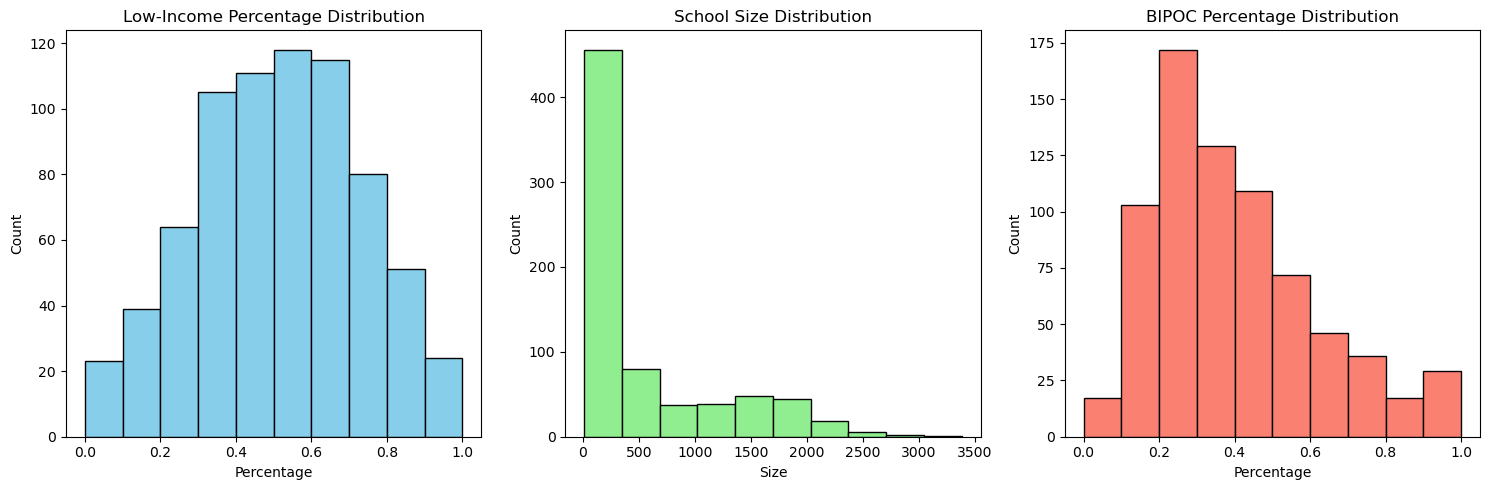

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = reduced_ospi

income_col = 'PercentLowIncome'
size_col = 'AllStudents'
bipoc_col = 'PercentBIPOC'

# Plot histograms for each feature
plt.figure(figsize=(15, 5))

# Low-income percentage histogram
plt.subplot(1, 3, 1)
plt.hist(df[income_col], bins=10, color='skyblue', edgecolor='black')
plt.title('Low-Income Percentage Distribution')
plt.xlabel('Percentage')
plt.ylabel('Count')

# School size histogram
plt.subplot(1, 3, 2)
plt.hist(df[size_col], bins=10, color='lightgreen', edgecolor='black')
plt.title('School Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')

# BIPOC percentage histogram
plt.subplot(1, 3, 3)
plt.hist(df[bipoc_col], bins=10, color='salmon', edgecolor='black')
plt.title('BIPOC Percentage Distribution')
plt.xlabel('Percentage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

An alternative binning strategy using quantiles:

In [24]:
reduced_ospi['IncomeBinnedQtl'] = pd.qcut(ospi_data['PercentLowIncome'], 5, labels=['1', '2', '3', '4', '5'])
reduced_ospi['SchoolSizeBinnedQtl'] = pd.qcut(ospi_data['AllStudents'], 5, labels=['1', '2', '3', '4', '5'])
reduced_ospi['BIPOCBinnedQtl'] = pd.qcut(ospi_data['PercentBIPOC'], 5, labels=['1', '2', '3', '4', '5'])

## Preprocessing: Adding median household income by county feature
This dataset is pulled from https://ofm.wa.gov/washington-data-research/economy-and-labor-force/median-household-income-estimates

2023 is a projection, all others are estimates

In [25]:
median_income = pd.read_csv('median_income.csv')

In [26]:
median_income.head()

,Unnamed: 0,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Washington,"31,183","33,417","34,379","35,882","36,679","37,895","38,997","40,568","42,399","44,514","45,776","44,120","45,761","46,039","46,967","49,585","50,004","53,522","56,141","57,858","55,458","54,888","55,500","56,444","57,284","60,153","63,439","65,500","69,288","72,297","78,674","80,319","84,155","91,255","94,308"
1,Adams,"24,604","28,024","27,301","28,328","31,277","29,537","29,604","31,806","31,795","34,073","33,888","35,292","37,839","38,306","38,934","39,235","39,105","41,298","42,299","42,455","41,102","40,656","41,068","42,354","43,541","45,712","47,646","49,501","48,849","52,870","53,535","56,421","57,405","62,410","64,498"
2,Asotin,"22,897","24,206","25,110","26,251","27,359","27,873","28,288","29,813","31,499","32,477","33,524","32,590","35,920","37,013","37,080","37,140","37,657","39,768","40,558","42,945","40,035","39,820","40,171","41,703","42,174","43,368","46,107","47,020","51,767","50,746","54,776","53,377","56,438","65,625","67,820"
3,Benton,"32,593","35,012","37,093","39,228","41,153","42,790","42,540","42,817","44,057","45,665","47,044","49,389","52,598","53,736","55,409","57,613","56,200","54,942","55,361","57,114","58,496","60,070","60,608","62,739","63,710","63,157","62,071","62,282","63,502","67,912","72,847","75,882","77,339","85,144","87,992"
4,Chelan,"24,312","25,833","27,592","28,746","30,148","31,547","32,164","33,918","35,662","37,175","37,316","39,439","41,653","41,731","42,918","43,696","44,422","46,522","44,964","44,013","46,780","45,478","46,275","47,265","51,713","50,825","53,068","55,109","60,791","60,747","59,838","61,546","64,700","81,697","84,430"


In [27]:
median_income.columns

Index(['Unnamed: 0', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [28]:
income = median_income[['Unnamed: 0','2022']]

In [29]:
income.columns = ['County','MedianIncome']

In [30]:
income.loc[:,'MedianIncome'] = income.loc[:,'MedianIncome'].str.strip()

In [31]:
income.loc[:,'MedianIncome'] = income.loc[:,'MedianIncome'].str.replace(',', '').astype(float)

In [32]:
income.dtypes

County          object
MedianIncome    object
dtype: object

In [33]:
with_income = pd.merge(reduced_ospi, income, on='County')

## Preprocessing: Preparing for tree-based algorithms
*Because tree based algorithms are not sensitive to feature scaling.*

In [34]:
## First version, using all available features and domain-informed binning strategy
df_for_tree = reduced_ospi.loc[:, ('CountyPop','Western_WA','DistrictSize','CS_Offered','IncomeBinned','SchoolSizeBinned','BIPOCBinned')]

In [35]:
## Same as version 1, with median household income by county added
df_for_tree_v3 = with_income.loc[:, ('CountyPop','Western_WA','DistrictSize','CS_Offered','IncomeBinned','SchoolSizeBinned','BIPOCBinned','MedianIncome')]

In [36]:
## Same as version 3, replacing bins with quantile binning strategy 
df_for_tree_v4 = with_income.loc[:, ('CountyPop','Western_WA','DistrictSize','CS_Offered','IncomeBinnedQtl','SchoolSizeBinnedQtl','BIPOCBinnedQtl','MedianIncome')]

In [37]:
## Same as version 4, without Western_WA feature
df_for_tree_v5 = with_income.loc[:, ('CountyPop','DistrictSize','CS_Offered','IncomeBinnedQtl','SchoolSizeBinnedQtl','BIPOCBinnedQtl','MedianIncome')]

## Preprocessing: Standardizing
Logistic regression and principal component analysis will benefit from standardizing.*

In [38]:
from sklearn.preprocessing import StandardScaler

X_to_scale = with_income.loc[:, ('CountyPop','DistrictSize','IncomeBinned','SchoolSizeBinned','BIPOCBinned','MedianIncome')]
y = with_income['CS_Offered']

sc = StandardScaler()
X_scaled = sc.fit_transform(X_to_scale)

In [39]:
from sklearn.preprocessing import StandardScaler

X_to_scale2 = with_income.loc[:, ('CountyPop','DistrictSize','IncomeBinned','SchoolSizeBinned','BIPOCBinned','Western_WA','MedianIncome')]
y = with_income['CS_Offered']

sc = StandardScaler()
X_scaled2 = sc.fit_transform(X_to_scale)

In [40]:
from sklearn.preprocessing import StandardScaler

X_to_scale3 = with_income.loc[:, ('CountyPop','DistrictSize','PercentLowIncome','AllStudents','PercentBIPOC','Western_WA','MedianIncome')]
y = with_income['CS_Offered']

sc = StandardScaler()
X_scaled3 = sc.fit_transform(X_to_scale3)

## Analysis: Random Forest

In [41]:
X_tree1 = df_for_tree.drop(['CS_Offered'], axis = 1)
y_tree1 = df_for_tree['CS_Offered']
X_train_tree1, X_test_tree1, y_train_tree1, y_test_tree1 = train_test_split(X_tree1, y_tree1, test_size=0.2)

In [42]:
param_dist_tree1 = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_tree1 = RandomForestClassifier(random_state=25)

# Use random search to find the best hyperparameters
rand_search_tree1 = RandomizedSearchCV(rf_tree1, 
                                 param_distributions = param_dist_tree1, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search_tree1.fit(X_train_tree1, y_train_tree1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x152b4e510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x152bec810>})

In [43]:
# Create a variable for the best model
best_rf_tree1 = rand_search_tree1.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_tree1.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 219}


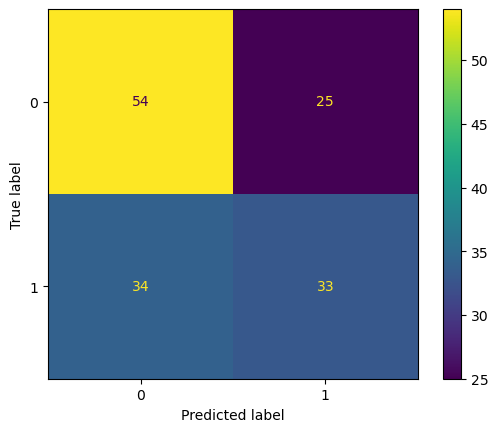

In [44]:
# Generate predictions with the best model
y_pred_tree1 = best_rf_tree1.predict(X_test_tree1)

# Create the confusion matrix
cm_tree1 = confusion_matrix(y_test_tree1, y_pred_tree1)

ConfusionMatrixDisplay(confusion_matrix=cm_tree1).plot();

In [45]:
accuracy_tree1 = accuracy_score(y_test_tree1, y_pred_tree1)
precision_tree1 = precision_score(y_test_tree1, y_pred_tree1)
recall_tree1 = recall_score(y_test_tree1, y_pred_tree1)

print("Accuracy:", accuracy_tree1)
print("Precision:", precision_tree1)
print("Recall:", recall_tree1)

Accuracy: 0.5958904109589042
Precision: 0.5689655172413793
Recall: 0.4925373134328358


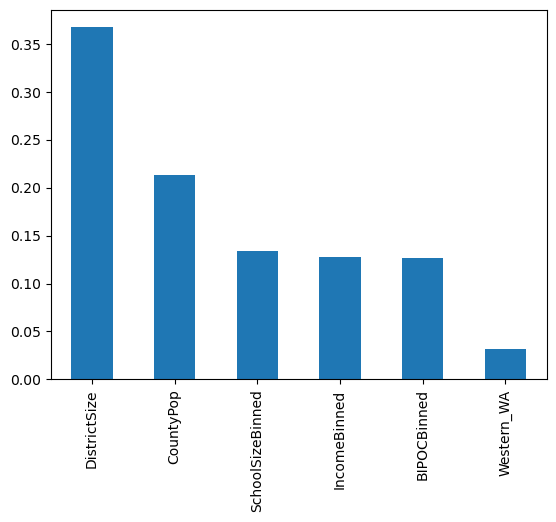

In [46]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_tree1 = pd.Series(best_rf_tree1.feature_importances_, index=X_train_tree1.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_tree1.plot.bar();

Best hyperparameters: {'max_depth': 4, 'n_estimators': 87}


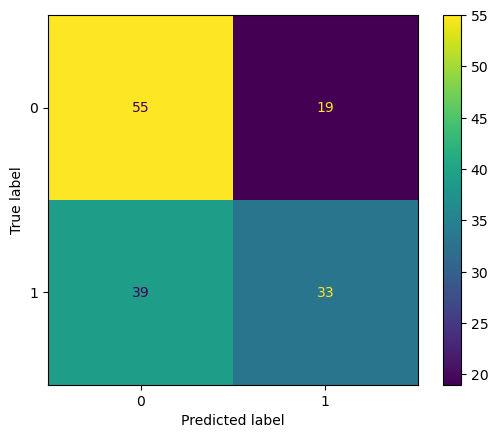

In [47]:
X_rf3 = df_for_tree_v3.drop(['CS_Offered'], axis = 1)
y_rf3 = df_for_tree_v3['CS_Offered']
X_train_rf3, X_test_rf3, y_train_rf3, y_test_rf3 = train_test_split(X_rf3, y_rf3, test_size=0.2)
param_dist_rf3 = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_rf3 = RandomForestClassifier(random_state=25)

# Use random search to find the best hyperparameters
rand_search_rf3 = RandomizedSearchCV(rf_rf3, 
                                 param_distributions = param_dist_rf3, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search_rf3.fit(X_train_rf3, y_train_rf3)
# Create a variable for the best model
best_rf_rf3 = rand_search_rf3.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_rf3.best_params_)
# Generate predictions with the best model
y_pred_rf3 = best_rf_rf3.predict(X_test_rf3)
# Generate predictions with the best model
y_pred_rf3 = best_rf_rf3.predict(X_test_rf3)

# Create the confusion matrix
cm_rf3 = confusion_matrix(y_test_rf3, y_pred_rf3)

ConfusionMatrixDisplay(confusion_matrix=cm_rf3).plot();

In [48]:
accuracy_rf3 = accuracy_score(y_test_rf3, y_pred_rf3)
precision_rf3 = precision_score(y_test_rf3, y_pred_rf3)
recall_rf3 = recall_score(y_test_rf3, y_pred_rf3)

print("Accuracy:", accuracy_rf3)
print("Precision:", precision_rf3)
print("Recall:", recall_rf3)

Accuracy: 0.6027397260273972
Precision: 0.6346153846153846
Recall: 0.4583333333333333


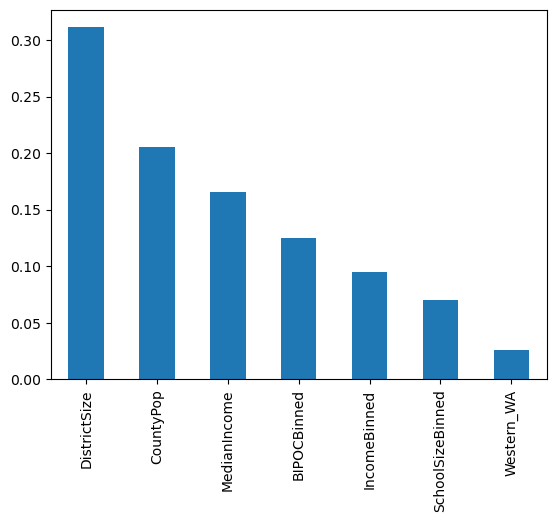

In [49]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_tree3 = pd.Series(best_rf_rf3.feature_importances_, index=X_train_rf3.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_tree3.plot.bar();

Best hyperparameters: {'max_depth': 2, 'n_estimators': 412}


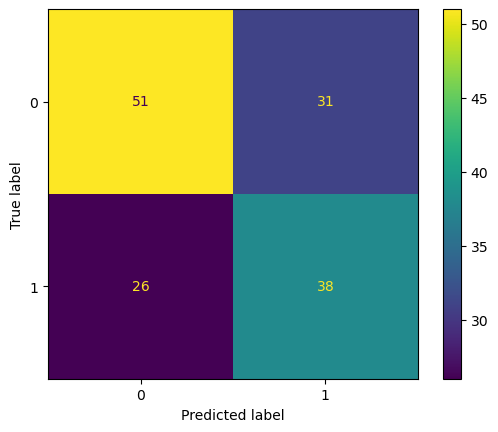

In [50]:
X_rf4 = df_for_tree_v4.drop(['CS_Offered'], axis = 1)
y_rf4 = df_for_tree_v4['CS_Offered']
X_train_rf4, X_test_rf4, y_train_rf4, y_test_rf4 = train_test_split(X_rf4, y_rf4, test_size=0.2)
param_dist_rf4 = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_rf4 = RandomForestClassifier(random_state=25)

# Use random search to find the best hyperparameters
rand_search_rf4 = RandomizedSearchCV(rf_rf4, 
                                 param_distributions = param_dist_rf4, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search_rf4.fit(X_train_rf4, y_train_rf4)
# Create a variable for the best model
best_rf_rf4 = rand_search_rf4.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_rf4.best_params_)
# Generate predictions with the best model
y_pred_rf4 = best_rf_rf4.predict(X_test_rf4)
# Generate predictions with the best model
y_pred_rf4 = best_rf_rf4.predict(X_test_rf4)

# Create the confusion matrix
cm_rf4 = confusion_matrix(y_test_rf4, y_pred_rf4)

ConfusionMatrixDisplay(confusion_matrix=cm_rf4).plot();

In [51]:
accuracy_rf4 = accuracy_score(y_test_rf4, y_pred_rf4)
precision_rf4 = precision_score(y_test_rf4, y_pred_rf4)
recall_rf4 = recall_score(y_test_rf4, y_pred_rf4)

print("Accuracy:", accuracy_rf4)
print("Precision:", precision_rf4)
print("Recall:", recall_rf4)

Accuracy: 0.6095890410958904
Precision: 0.5507246376811594
Recall: 0.59375


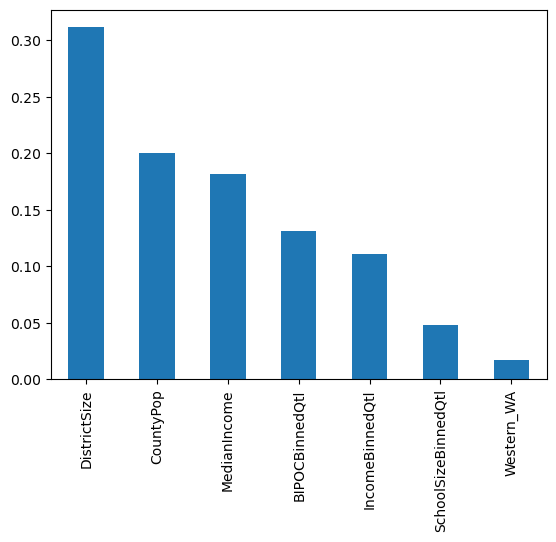

In [52]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_tree4 = pd.Series(best_rf_rf4.feature_importances_, index=X_train_rf4.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_tree4.plot.bar();

### Examining the most successful random forest model further

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Perform cross-validation with return of fitted models
cv_results = cross_validate(rf_rf4, X_rf4, y_rf4, cv=5, return_estimator=True, scoring='accuracy')

# Collect Gini importance from each fold
feature_importances_k = [estimator.feature_importances_ for estimator in cv_results['estimator']]

# Calculate mean and standard deviation of feature importance across folds
importance_df = pd.DataFrame(feature_importances_k, columns=X_rf4.columns)
mean_importance = importance_df.mean()
std_importance = importance_df.std()

# Display feature importance summary
importance_summary = pd.DataFrame({
    'Feature': X_rf4.columns,
    'Mean Gini Importance': mean_importance,
    'Standard Deviation': std_importance
}).sort_values(by='Mean Gini Importance', ascending=False)

print("Feature Importance from Gini Index (Cross-Validation):")
print(importance_summary)

# Fit the model on the entire dataset to get permutation importance
rf_rf4.fit(X_rf4, y_rf4)
perm_importance = permutation_importance(rf_rf4, X_rf4, y_rf4, scoring='accuracy', n_repeats=10, random_state=42)

# Display permutation importance results
perm_importance_df = pd.DataFrame({
    'Feature': X_rf4.columns,
    'Permutation Importance': perm_importance.importances_mean
}).sort_values(by='Permutation Importance', ascending=False)

print("\nFeature Importance from Permutation:")
print(perm_importance_df)

Feature Importance from Gini Index (Cross-Validation):
                                 Feature  Mean Gini Importance  \
DistrictSize                DistrictSize              0.303542   
BIPOCBinnedQtl            BIPOCBinnedQtl              0.148954   
IncomeBinnedQtl          IncomeBinnedQtl              0.143327   
SchoolSizeBinnedQtl  SchoolSizeBinnedQtl              0.136649   
CountyPop                      CountyPop              0.124045   
MedianIncome                MedianIncome              0.117921   
Western_WA                    Western_WA              0.025561   

                     Standard Deviation  
DistrictSize                   0.009506  
BIPOCBinnedQtl                 0.009555  
IncomeBinnedQtl                0.004860  
SchoolSizeBinnedQtl            0.002714  
CountyPop                      0.005561  
MedianIncome                   0.009174  
Western_WA                     0.001458  

Feature Importance from Permutation:
               Feature  Permutation Import

This shows that we can confidently interpret the feature importance from this random forest model. Comparing feature importance < Elaborate further >

Best hyperparameters: {'max_depth': 1, 'n_estimators': 164}


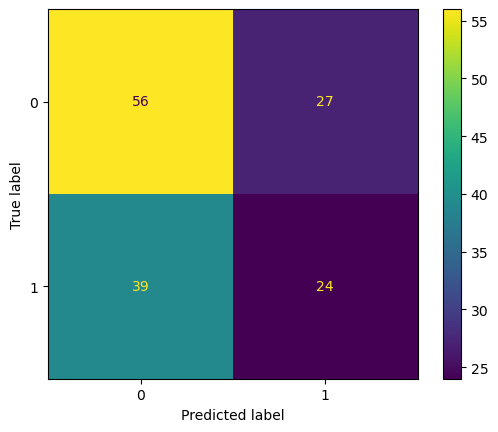

In [54]:
X_rf5 = df_for_tree_v5.drop(['CS_Offered'], axis = 1)
y_rf5 = df_for_tree_v5['CS_Offered']
X_train_rf5, X_test_rf5, y_train_rf5, y_test_rf5 = train_test_split(X_rf5, y_rf5, test_size=0.2)
param_dist_rf5 = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_rf5 = RandomForestClassifier(random_state=25)

# Use random search to find the best hyperparameters
rand_search_rf5 = RandomizedSearchCV(rf_rf5, 
                                 param_distributions = param_dist_rf5, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search_rf5.fit(X_train_rf5, y_train_rf5)
# Create a variable for the best model
best_rf_rf5 = rand_search_rf5.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search_rf5.best_params_)
# Generate predictions with the best model
y_pred_rf5 = best_rf_rf5.predict(X_test_rf5)
# Generate predictions with the best model
y_pred_rf5 = best_rf_rf5.predict(X_test_rf5)

# Create the confusion matrix
cm_rf5 = confusion_matrix(y_test_rf5, y_pred_rf5)

ConfusionMatrixDisplay(confusion_matrix=cm_rf5).plot();

In [55]:
accuracy_rf5 = accuracy_score(y_test_rf5, y_pred_rf5)
precision_rf5 = precision_score(y_test_rf5, y_pred_rf5)
recall_rf5 = recall_score(y_test_rf5, y_pred_rf5)

print("Accuracy:", accuracy_rf5)
print("Precision:", precision_rf5)
print("Recall:", recall_rf5)

Accuracy: 0.547945205479452
Precision: 0.47058823529411764
Recall: 0.38095238095238093


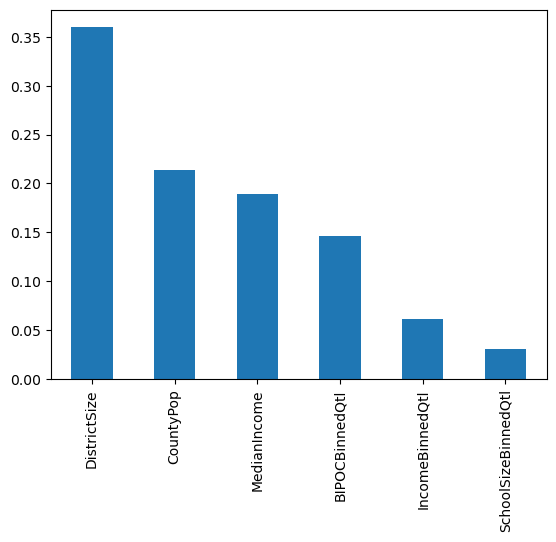

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_tree5 = pd.Series(best_rf_rf5.feature_importances_, index=X_train_rf5.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_tree5.plot.bar();

## Analysis: Logistic Regression
### Correlation Heatmap
*To ensure there is not multicollinearity with our independent variables*

In [67]:
df_logistic_reg = with_income.loc[:, ('CountyPop','Western_WA','DistrictSize','CS_Offered','IncomeBinnedQtl','SchoolSizeBinnedQtl','BIPOCBinnedQtl','MedianIncome')]

In [68]:
df_logistic_reg.dtypes

CountyPop                 int64
Western_WA               object
DistrictSize              int64
CS_Offered                int64
IncomeBinnedQtl        category
SchoolSizeBinnedQtl    category
BIPOCBinnedQtl         category
MedianIncome             object
dtype: object

In [69]:
df_logistic_reg['IncomeBinnedQtl'] = df_logistic_reg['IncomeBinnedQtl'].cat.codes
df_logistic_reg['SchoolSizeBinnedQtl'] = df_logistic_reg['SchoolSizeBinnedQtl'].cat.codes
df_logistic_reg['BIPOCBinnedQtl'] = df_logistic_reg['BIPOCBinnedQtl'].cat.codes

In [70]:
df_logistic_reg.dtypes

CountyPop               int64
Western_WA             object
DistrictSize            int64
CS_Offered              int64
IncomeBinnedQtl          int8
SchoolSizeBinnedQtl      int8
BIPOCBinnedQtl           int8
MedianIncome           object
dtype: object

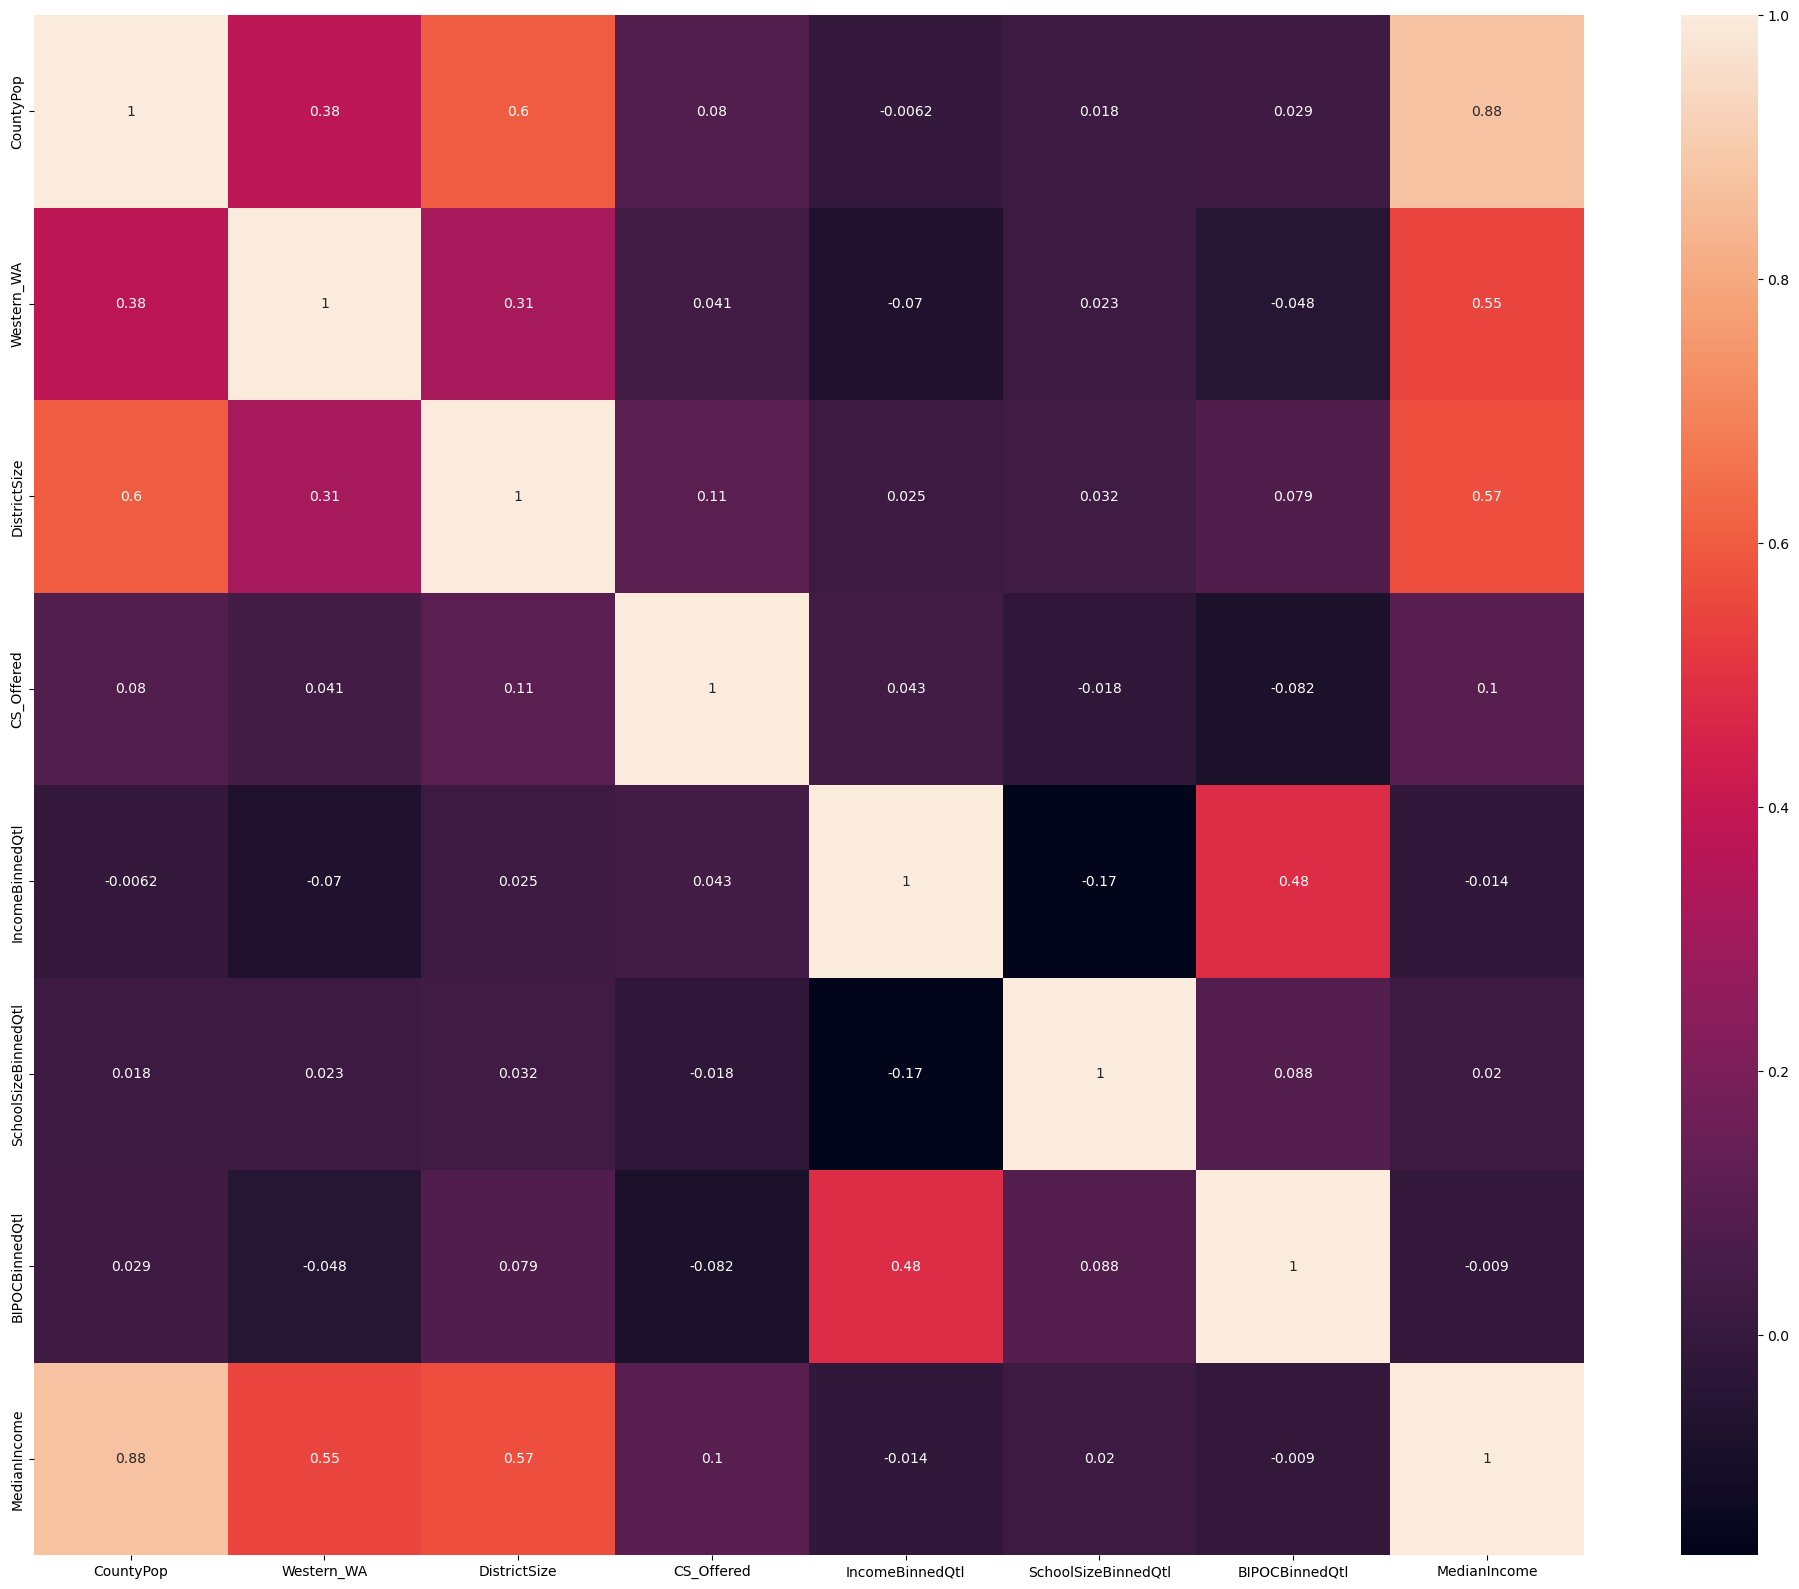

In [71]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(df_logistic_reg.corr(), annot=True)
plt.savefig("Heatmap.png")

Two of these features have a high correlation between MedianIncome and CountyPop.

We can: 
* Drop one of them, perhaps by using what we've learned in the feature importance above that is related to the random forest analysis
* Combine the two, either by adding the two, averaging the two or combining with the help of PCA
* Experiment with all of the above

None of the rest of the features have high correlation (over .7) with one another, so we can include them in this analysis. Keeping in mind that the sample size may not be large enough to yield significant results. Four features with the next highest correlation to be mindful of:

* DistrictSize and CountyPop: .6
* IncomeBinned and BIPOCBinned: .49

Something else interesting to note with this correlation heatmap is that IncomeBinnedQtl and MedianIncome do not show much of a correlation. A probable explanation for this is the wide range of income levels between schools in the same county. This further supports the hypothesis that the school a student attends has the highest predictive value as to whether the student enrolls in CS or not. The individual traits and the broader county that they live in are less likely to influence their enrollment than the school they attend.

In [72]:
df_logistic_reg1 = with_income.loc[:, ('CountyPop','Western_WA','DistrictNumSchools','DistrictSize','CS_Offered','IncomeBinnedQtl','SchoolSizeBinnedQtl','BIPOCBinnedQtl')]
df_logistic_reg1['IncomeBinnedQtl'] = df_logistic_reg1['IncomeBinnedQtl'].cat.codes
df_logistic_reg1['SchoolSizeBinnedQtl'] = df_logistic_reg1['SchoolSizeBinnedQtl'].cat.codes
df_logistic_reg1['BIPOCBinnedQtl'] = df_logistic_reg1['BIPOCBinnedQtl'].cat.codes

In [73]:
X_lr1 = df_logistic_reg1.drop(['CS_Offered'], axis = 1)
y_lr1 = df_logistic_reg1['CS_Offered']

scaler = StandardScaler()
X_scaled_lr1 = scaler.fit_transform(X_lr1)

X_train_lr1, X_test_lr1, y_train_lr1, y_test_lr1 = train_test_split(X_lr1, y_lr1, test_size=0.3, random_state=0)
logreg_lr1 = LogisticRegression()
logreg_lr1.fit(X_train_lr1, y_train_lr1)

LogisticRegression()

In [74]:
y_pred_lr1 = logreg_lr1.predict(X_test_lr1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_lr1.score(X_test_lr1, y_test_lr1)))

Accuracy of logistic regression classifier on test set: 0.49


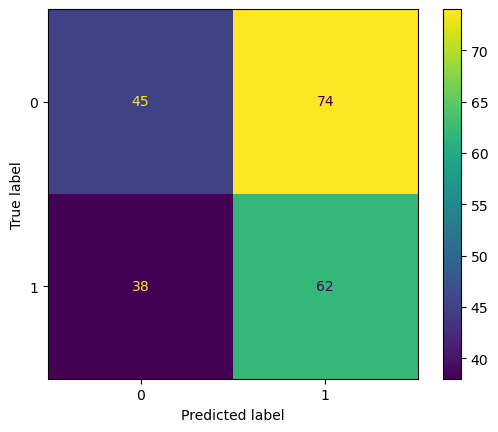

In [75]:
cm_lr1 = confusion_matrix(y_test_lr1, y_pred_lr1)

ConfusionMatrixDisplay(confusion_matrix=cm_lr1).plot();

The inaccuracy here may be due to the insufficient amount of data. Another possible reason is that the relationships in the data are likely non-linear and cannot be effectively modeled with a simple linear decision boundary.

## Analysis: PCA  

Eigenvalues:
[2.3809603  1.50567788 1.05969767 0.5132515  0.42483321 0.1238099 ]

Variances (Percentage):
[39.62831181 25.06025514 17.63743375  8.54247351  7.07085415  2.06067164]



Text(0, 0.5, 'Explained variance (%)')

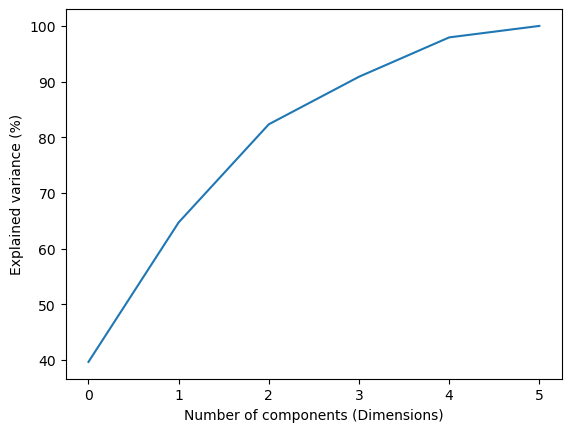

In [76]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [79]:
feature_names = X_to_scale.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
CountyPop,0.937896,-0.023671,-0.051433,-0.210180,0.101394,-0.253102
DistrictSize,0.797399,0.050294,0.027813,0.551234,-0.241181,0.014025
IncomeBinned,0.003112,0.878932,-0.145764,-0.231851,-0.392218,-0.002046
SchoolSizeBinned,0.061702,-0.165257,0.958832,-0.133283,-0.181971,-0.004151
BIPOCBinned,0.038431,0.837046,0.336536,0.163884,0.398860,0.006716
MedianIncome,0.927455,-0.045943,-0.049146,-0.258535,0.101720,0.243898


In [80]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", pca.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.39628312 0.25060255 0.17637434 0.08542474 0.07070854 0.02060672]
Cumulative variance explained: [0.39628312 0.64688567 0.82326001 0.90868474 0.97939328 1.        ]


### Principal Components: Key Contributing Features
* **PC1 (40%)**:  CountyPop, DistrictSize, MedianIncome

* **PC2 (25%)**:  IncomeBinned, BIPOCBinned

* **PC3 (18%)**:  SchoolSizeBinned

* **PC4 (9%)**:  CountyPop, DistrictNumSchools, MedianIncome (*.4 < loadings < .5*, but strongest of this PC)

* **PC5 (7%)**:  IncomeBinned, BIPOCBinned (*.4 < loadings < .5*, but strongest of this PC)

* **PC6-PC7 (2%%)**: No strong contributing features

This suggests that < elaborate >

## Mutual Information

<Axes: >

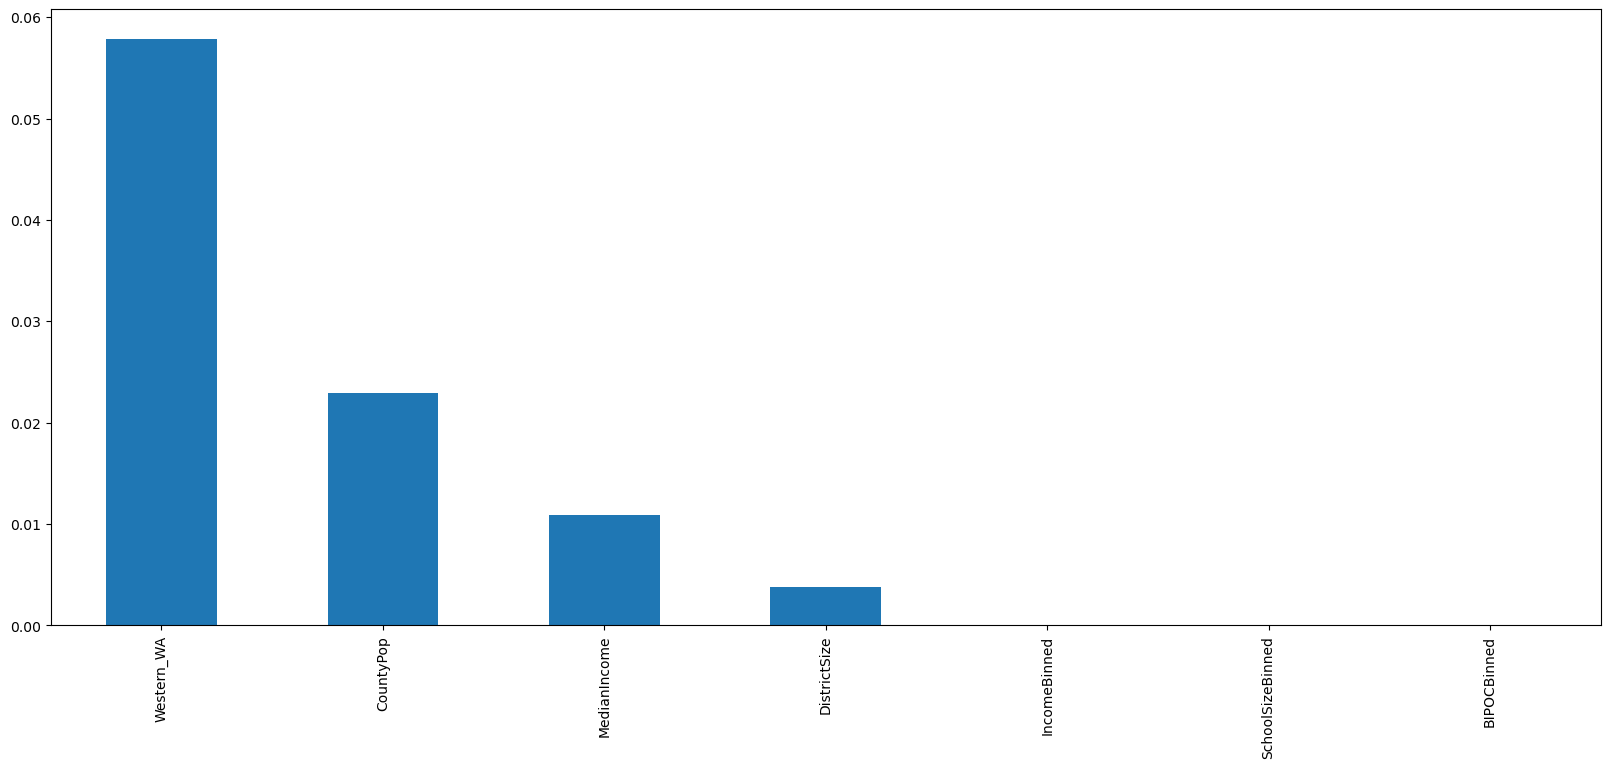

In [104]:
X_mi2 = X_to_scale2
y_mi2 = with_income['CS_Offered']
X_train_mi2, X_test_mi2, y_train_mi2, y_test_mi2 = train_test_split(X_mi2, y_mi2, test_size=0.2, random_state=1234)

from sklearn.feature_selection import mutual_info_classif
mutual_info2 = mutual_info_classif(X_train_mi2, y_train_mi2)


mutual_info2 = pd.Series(mutual_info2)
mutual_info2.index = X_train_mi2.columns
mutual_info2.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [97]:
X_mi = X_to_scale3
y_mi = with_income['CS_Offered']
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi, y_mi, test_size=0.2, random_state=1234)

In [98]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_mi, y_train_mi)
mutual_info

array([0.00744025, 0.00262826, 0.04301561, 0.24735129, 0.04969553,
       0.00652204, 0.014073  ])

<Axes: >

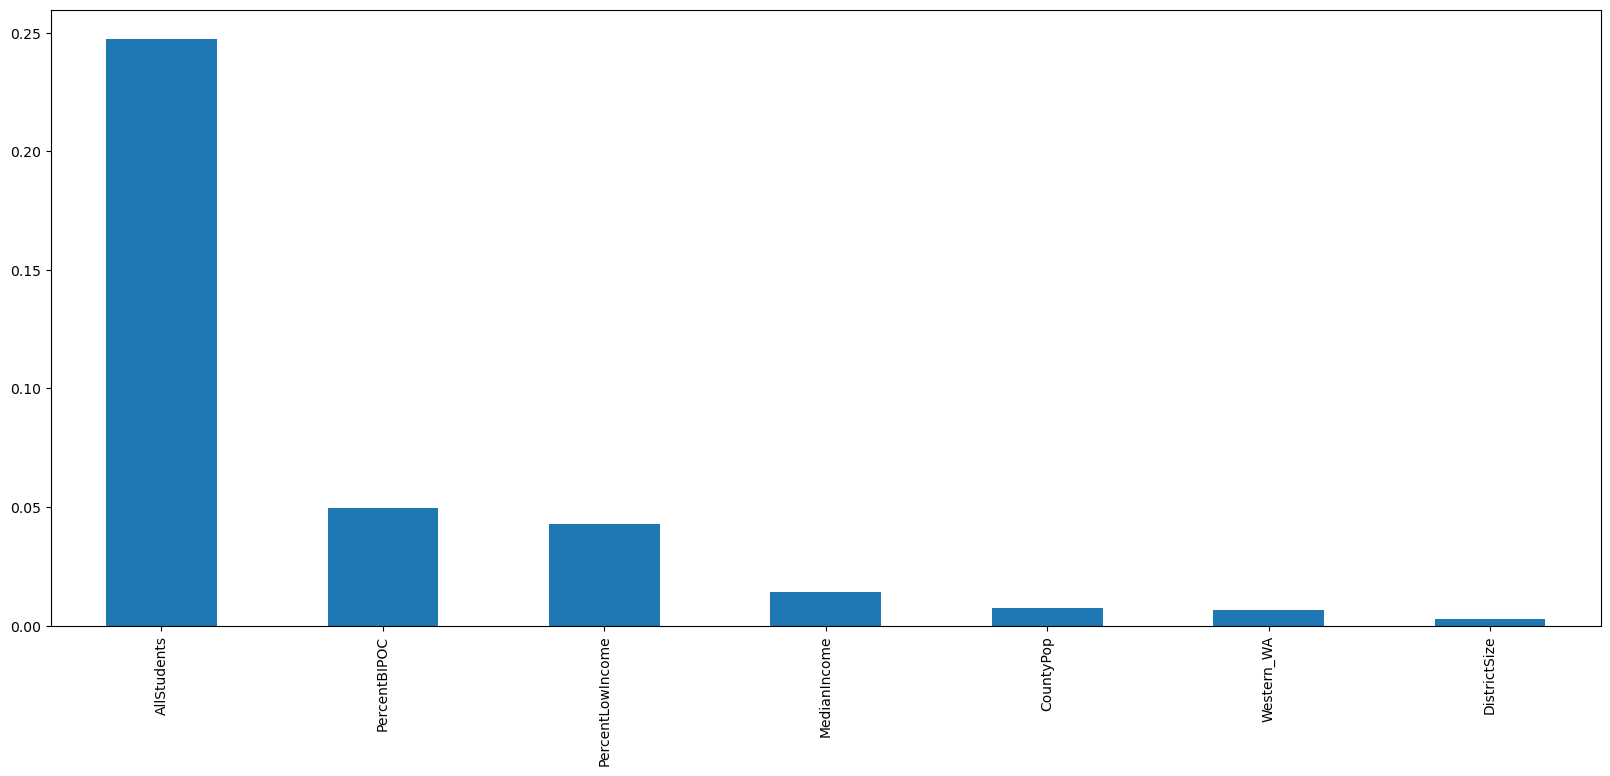

In [99]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_mi.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

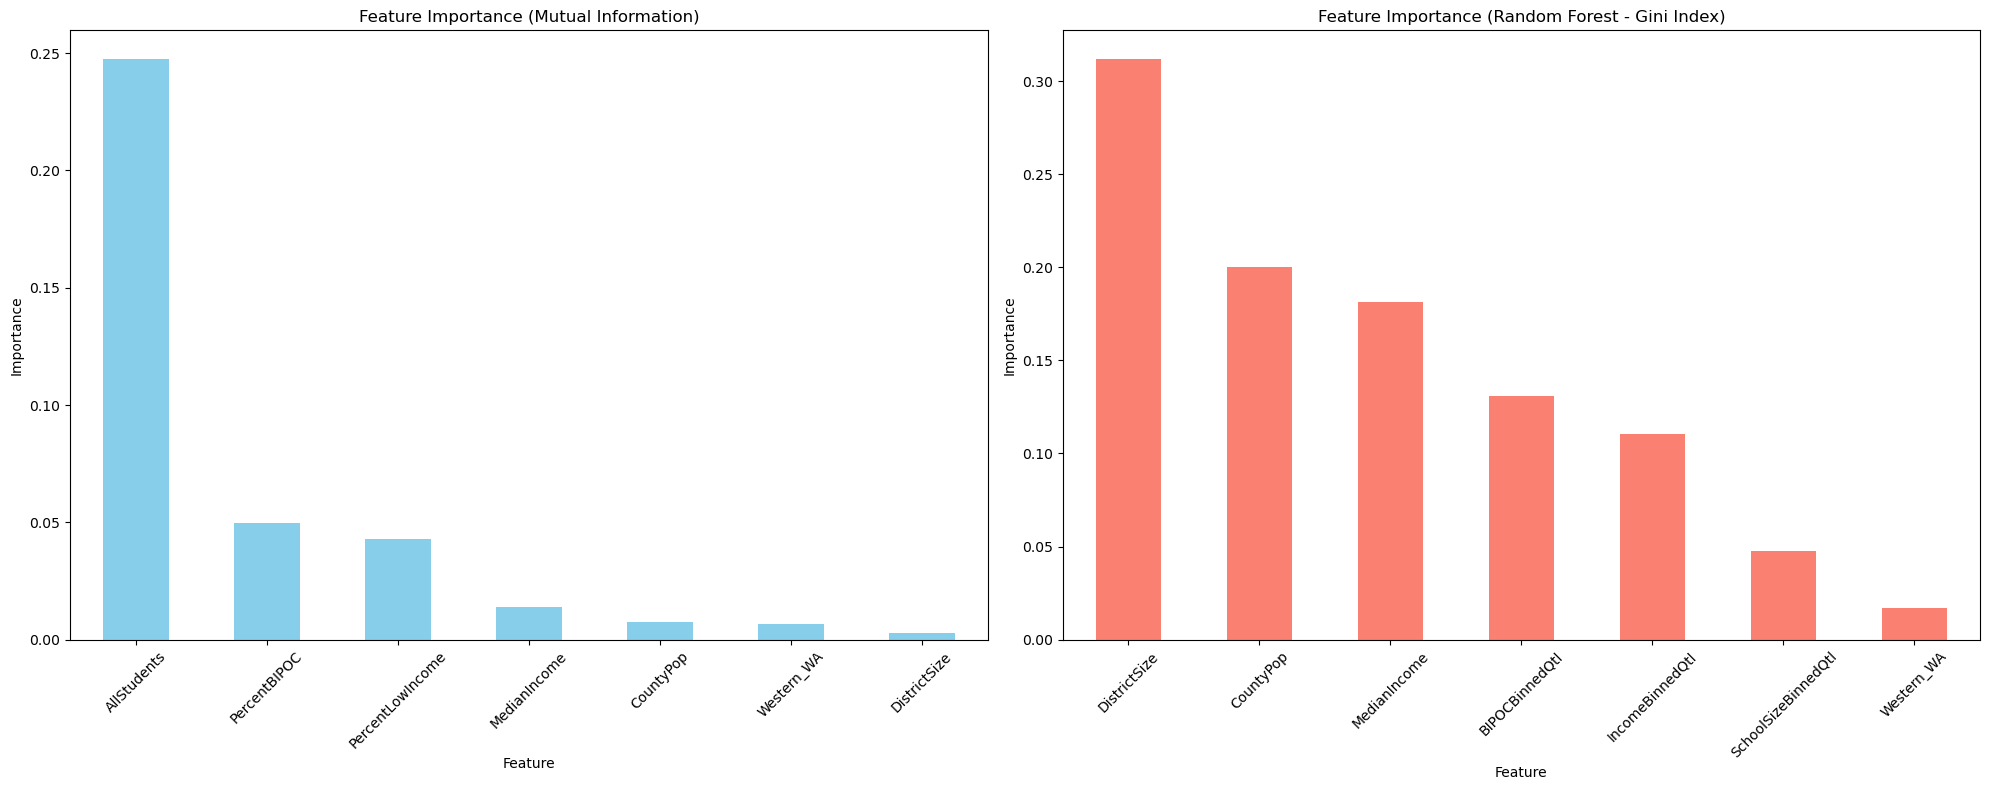

In [100]:
# Ensure mutual_info is a Pandas Series with feature names
mutual_info_series = pd.Series(mutual_info, index=X_train_mi.columns).sort_values(ascending=False)

# Ensure feature_importances_tree4 is a Pandas Series
feature_importances_series = feature_importances_tree4.sort_values(ascending=False)

# Plot both charts side by side using subplots
plt.figure(figsize=(20, 8))

# Mutual Information bar chart
plt.subplot(1, 2, 1)
mutual_info_series.plot.bar(color='skyblue')
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Feature Importance (Random Forest) bar chart
plt.subplot(1, 2, 2)
feature_importances_series.plot.bar(color='salmon')
plt.title('Feature Importance (Random Forest - Gini Index)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
